# Exploratory Data Analysis for Machine Learning - Course Project

### Dataset Used : Coursera Course Dataset
#### URL : https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset

## Data Brief
Course dataset scrapped from Coursera website. This dataset contains mainly 6 columns and 890 course data. The detailed description:

1. course_title : Contains the course title.
2. course_organization : It tells which organization is conducting the courses.
3. courseCertificatetype : It has details about what are the different certifications available in courses.
4. course_rating : It has the ratings associated with each course.
5. course_difficulty : It tells about how difficult or what is the level of the course.
6. coursestudentsenrolled : It has the number of students that are enrolled in the course.

### Data Loading and Basic Review

Required Modules

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

Data Loading and Basic Exploration

In [112]:
df=pd.read_csv("coursea_data.csv")
df.head()

,index,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


So, 1 numarical object only. But, we can turn some others to numarical too.

In [7]:
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


Mean course rating is 4.677329. Quite high, as the rating can be given from 0-5. Minimum is 3.3, highest is 5 - proves so.

### Initial plan for data exploration

Data Exploration
1. Ploting course_rating to get a overview of the distribution.
2. analyzing course Certificate types values.

Data Cleaning
1. Deleting first Unnamed column
2. Deleting course name - not necessary now; as all the values are unique

#### Data Exploration
Basic Rating distribution : 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f15879a370>,
 'caps': [<matplotlib.lines.Line2D at 0x1f157a46730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f15879ab80>],
 'medians': [<matplotlib.lines.Line2D at 0x1f158892a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f1588922e0>],
 'means': []}

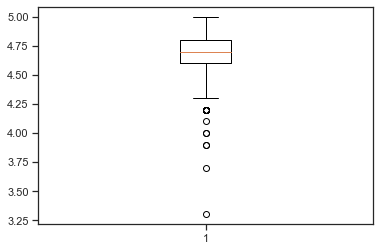

In [51]:
# Ploting course_rating to get a overview of the distribution.
plt.boxplot(df['course_rating'])

<AxesSubplot:>

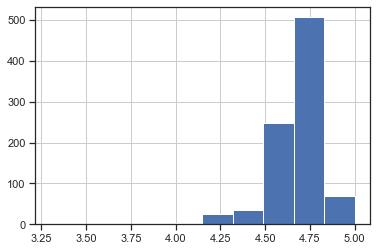

In [57]:
# Ploting course_rating to get a overview of the distribution.
df['course_rating'].hist()

Rating distribution per course difficulty :

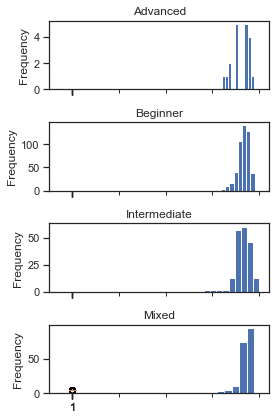

In [52]:
g = df.groupby('course_difficulty')['course_rating']
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(4, 6))

for i, (type,rating) in enumerate(g):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type)
fig.tight_layout()

Rating distribution per course type :

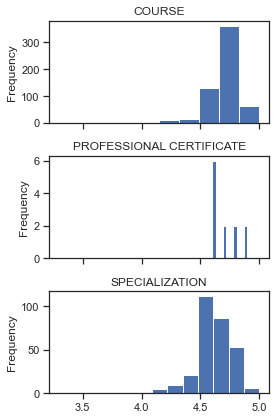

In [50]:
g = df.groupby('course_Certificate_type')['course_rating']
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(4, 6))

for i, (type,rating) in enumerate(g):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type,bins=10)
fig.tight_layout()

Combined

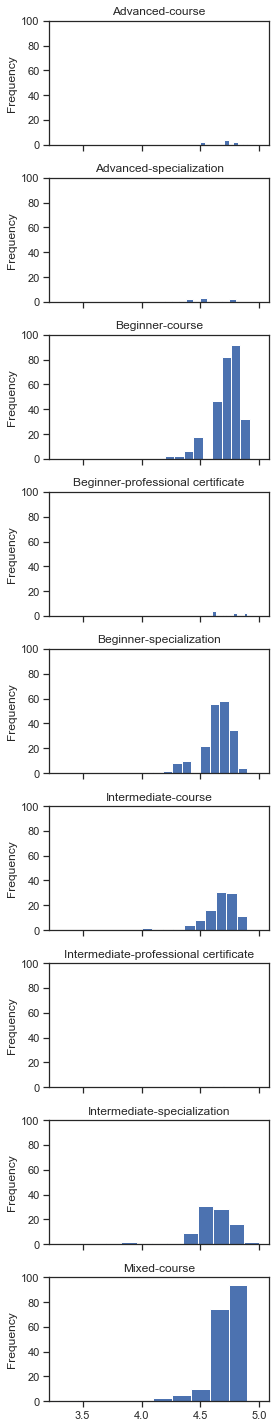

In [98]:
g = df.groupby(['course_difficulty','course_Certificate_type'])['course_rating']
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(4, 20))

for i, (type,rating) in enumerate(g):
    axes[i].set_ylim(0, 100)
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type[0]+"-"+type[1].lower(),bins=10)
fig.tight_layout()

Analyzing course Certificate types values.

<AxesSubplot:ylabel='course_difficulty'>

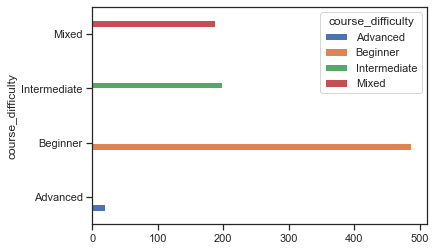

In [73]:
df.groupby('course_difficulty').course_difficulty.value_counts().unstack().plot.barh()

<AxesSubplot:ylabel='course_Certificate_type'>

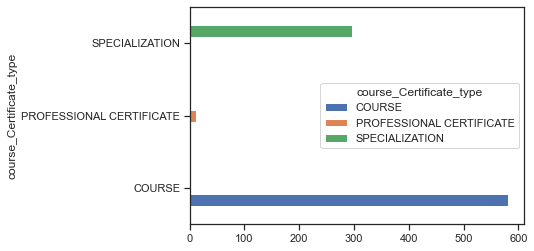

In [72]:
df.groupby('course_Certificate_type').course_Certificate_type.value_counts().unstack().plot.barh()

#### Data Cleaning
1. Deleting first Unnamed column
2. Deleting course name - not necessary now; as all the values are unique

In [113]:
df=df.drop(['course_title','index'],1)

C:\Users\AZMINE~1\AppData\Local\Temp/ipykernel_13164/1849970809.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=df.drop(['course_title','index'],1)


### Feature Engineering

1. Modifying course_students_enrolled column